In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
%store -r final_draftDB
%store -r team_count

In [7]:
final_draftDB.head()

,Overall,Team,Player,Pos,Age,Height,Weight,D-1_GP,D0_GP,Total GP,D-1_NHLe,D0_NHLe,NHLe Total,NHLe Progression,NHLer,GP
0,1,Chicago Blackhawks,Patrick Kane,RW,18.0,177.80,178.0,43.0,58.0,101.0,11.27172,29.52000,40.79172,18.24828,1.0,1126.0
1,2,Philadelphia Flyers,James van Riemsdyk,LW,18.0,190.50,200.0,32.0,30.0,62.0,3.78102,12.60094,16.38196,8.81992,1.0,885.0
2,3,Phoenix Coyotes,Kyle Turris,C,18.0,185.42,185.0,57.0,53.0,110.0,8.26560,14.95680,23.22240,6.69120,1.0,776.0
3,4,Los Angeles Kings,Thomas Hickey,D,18.0,180.34,184.0,69.0,68.0,137.0,4.74042,8.55588,13.29630,3.81546,1.0,456.0
4,5,Washington Capitals,Karl Alzner,D,18.0,190.50,206.0,70.0,63.0,133.0,3.93108,8.67150,12.60258,4.74042,1.0,686.0


In [21]:
print(team_count.shape)
print(final_draftDB.shape)

(1512, 38)
(1512, 16)


In [22]:
final_draftDB['PTS'] = team_count['PTS']

In [23]:
final_draftDB.columns

Index(['Overall', 'Team', 'Player', 'Pos', 'Age', 'Height', 'Weight', 'D-1_GP',
       'D0_GP', 'Total GP', 'D-1_NHLe', 'D0_NHLe', 'NHLe Total',
       'NHLe Progression', 'NHLer', 'GP', 'PTS'],
      dtype='object')

In [24]:
final_draftDB['Team'].unique()

array(['Chicago Blackhawks', 'Philadelphia Flyers', 'Phoenix Coyotes',
       'Los Angeles Kings', 'Washington Capitals', 'Edmonton Oilers',
       'Columbus Blue Jackets', 'Boston Bruins', 'San Jose Sharks',
       'Florida Panthers', 'Carolina Hurricanes', 'Montreal Canadiens',
       'St. Louis Blues', 'Colorado Avalanche', 'Minnesota Wild',
       'New York Rangers', 'Anaheim Ducks', 'Pittsburgh Penguins',
       'Nashville Predators', 'Calgary Flames', 'Vancouver Canucks',
       'Detroit Red Wings', 'Ottawa Senators', 'Buffalo Sabres',
       'Tampa Bay Lightning', 'Dallas Stars', 'New Jersey Devils',
       'New York Islanders', 'Atlanta/Winnipeg', 'Toronto Maple Leafs'],
      dtype=object)

In [11]:
# Correct mis-spelled city names in dataset

final_draftDB['Team'] = final_draftDB['Team'].replace('Pheonix Coyotes', 'Phoenix Coyotes')

In [14]:
# Combine Atlanta and Winnipeg to reflect team's location change

final_draftDB['Team'] = final_draftDB['Team'].replace('Atlanta Thrashers', 'Atlanta/Winnipeg')
final_draftDB['Team'] = final_draftDB['Team'].replace('Winnipeg Jets', 'Atlanta/Winnipeg')

## Developing Visuals for Team performance at draft based on Games Played and Points Scored

In [62]:
viz=final_draftDB.groupby('Team').agg({'GP':'sum', 'Team': 'count', 'PTS': 'sum'})

In [75]:
# Create column representing the number of games played divided by total picks
# Create column representing the number of points scored divided by total picks 

viz['GP/Pick'] = viz['GP']/viz['Team']
viz['PTS/Pick'] = viz['PTS']/viz['Team']

In [76]:
viz['GP/Pick'] = viz['GP/Pick'].round(2)
viz['PTS/Pick'] = viz['PTS/Pick'].round(2)

In [145]:
vizGP = viz.sort_values('GP', ascending=False)

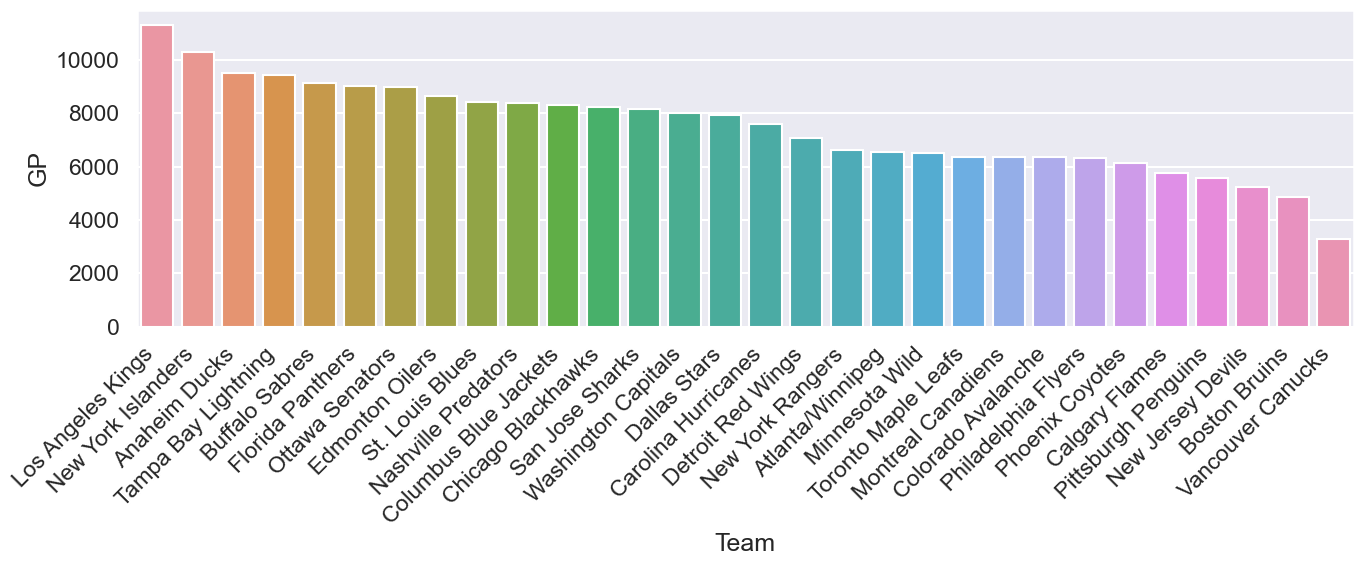

In [146]:
# Display figure showing cumulative games played of all draft picks for each team

sns.set_theme(style='darkgrid', context='talk')
plt.figure(figsize=(14,6))

ax = sns.barplot(x=vizGP.index, y=vizGP['GP'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [151]:
vizPTS = viz.sort_values('PTS', ascending=False)

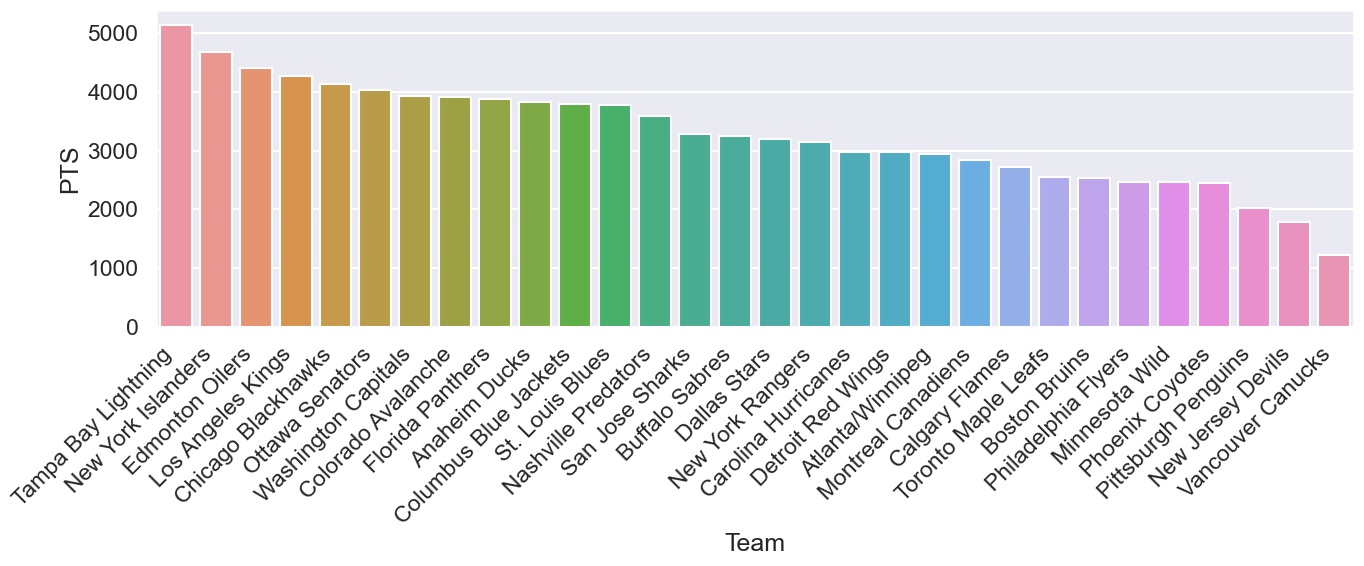

In [152]:
# Display figure showing cumulative points scored of all draft picks for each team

sns.set_theme(style='darkgrid', context='talk')
plt.figure(figsize=(14,6))

ax = sns.barplot(x=vizPTS.index, y=vizPTS['PTS'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [156]:
vizPick = viz.sort_values('GP/Pick', ascending=False)

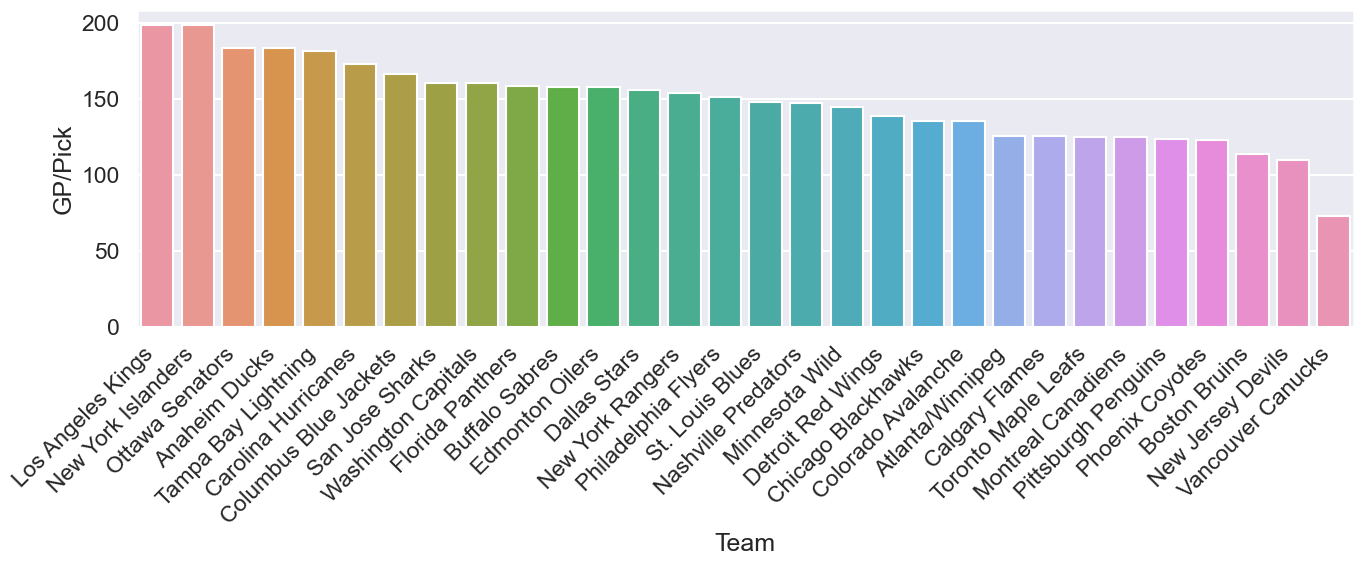

In [157]:
# Display figure showing cumulative games played of all draft picks for each team relative to number
# of picks for said team

sns.set_theme(style='darkgrid', context='talk')
plt.figure(figsize=(14,6))

ax = sns.barplot(x=vizPick.index, y=vizPick['GP/Pick'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [158]:
vizPtsPick = viz.sort_values('PTS/Pick', ascending=False)

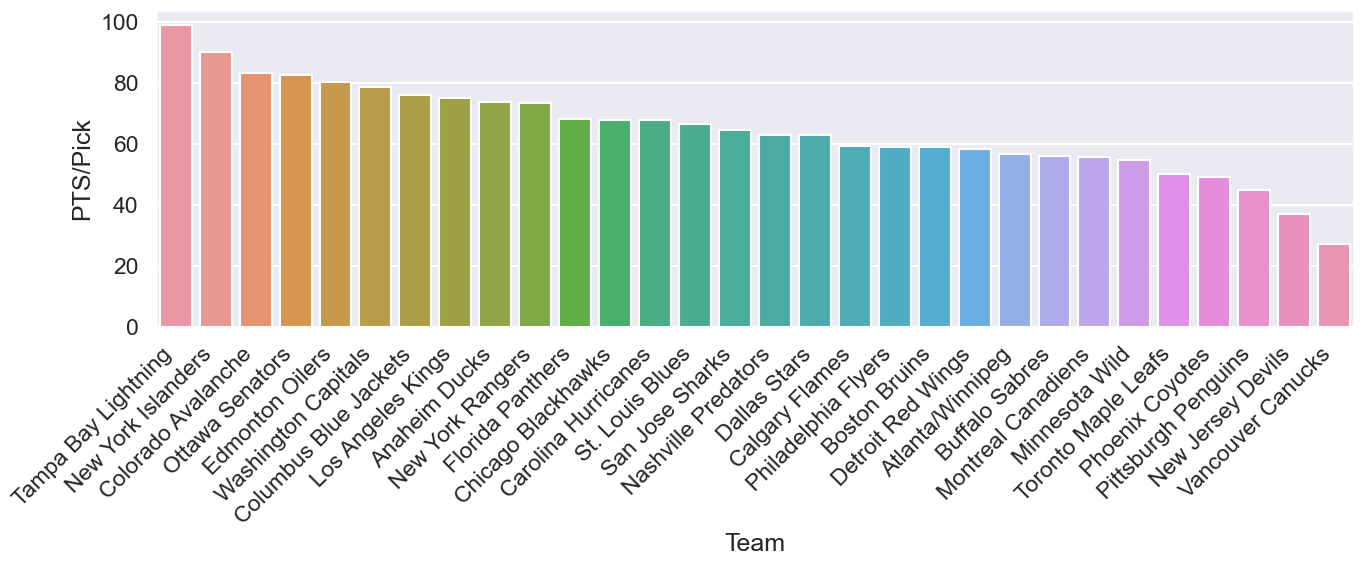

In [159]:
# Display figure showing cumulative points scored per pick of all draft picks for each team

sns.set_theme(style='darkgrid', context='talk')
plt.figure(figsize=(14,6))

ax = sns.barplot(x=vizPtsPick.index, y=vizPtsPick['PTS/Pick'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Developing Visuals for Pick probability based on which round they were selected in

In [79]:
final_draftDB.head()

,Overall,Team,Player,Pos,Age,Height,Weight,D-1_GP,D0_GP,Total GP,D-1_NHLe,D0_NHLe,NHLe Total,NHLe Progression,NHLer,GP,PTS
0,1,Chicago Blackhawks,Patrick Kane,RW,18.0,177.80,178.0,43.0,58.0,101.0,11.27172,29.52000,40.79172,18.24828,1.0,1126.0,1195.0
1,2,Philadelphia Flyers,James van Riemsdyk,LW,18.0,190.50,200.0,32.0,30.0,62.0,3.78102,12.60094,16.38196,8.81992,1.0,885.0,567.0
2,3,Phoenix Coyotes,Kyle Turris,C,18.0,185.42,185.0,57.0,53.0,110.0,8.26560,14.95680,23.22240,6.69120,1.0,776.0,425.0
3,4,Los Angeles Kings,Thomas Hickey,D,18.0,180.34,184.0,69.0,68.0,137.0,4.74042,8.55588,13.29630,3.81546,1.0,456.0,117.0
4,5,Washington Capitals,Karl Alzner,D,18.0,190.50,206.0,70.0,63.0,133.0,3.93108,8.67150,12.60258,4.74042,1.0,686.0,130.0


In [80]:
# create a list of our conditions
conditions = [
    final_draftDB['Overall'] < 31,
    (final_draftDB['Overall'] >=31) & (final_draftDB['Overall'] < 62),
    (final_draftDB['Overall'] >=62) & (final_draftDB['Overall'] < 92),
    (final_draftDB['Overall'] >=92) & (final_draftDB['Overall'] < 122),
    (final_draftDB['Overall'] >=122) & (final_draftDB['Overall'] < 152),
    (final_draftDB['Overall'] >=152) & (final_draftDB['Overall'] < 182),
    (final_draftDB['Overall'] >=182) & (final_draftDB['Overall'] < 212)
]
    
# create a list of the values we want to assign for each condition
values = [1, 2, 3, 4, 5, 6, 7]

final_draftDB['Round'] = np.select(conditions, values)

final_draftDB.head()

,Overall,Team,Player,Pos,Age,Height,Weight,D-1_GP,D0_GP,Total GP,D-1_NHLe,D0_NHLe,NHLe Total,NHLe Progression,NHLer,GP,PTS,Round
0,1,Chicago Blackhawks,Patrick Kane,RW,18.0,177.80,178.0,43.0,58.0,101.0,11.27172,29.52000,40.79172,18.24828,1.0,1126.0,1195.0,1
1,2,Philadelphia Flyers,James van Riemsdyk,LW,18.0,190.50,200.0,32.0,30.0,62.0,3.78102,12.60094,16.38196,8.81992,1.0,885.0,567.0,1
2,3,Phoenix Coyotes,Kyle Turris,C,18.0,185.42,185.0,57.0,53.0,110.0,8.26560,14.95680,23.22240,6.69120,1.0,776.0,425.0,1
3,4,Los Angeles Kings,Thomas Hickey,D,18.0,180.34,184.0,69.0,68.0,137.0,4.74042,8.55588,13.29630,3.81546,1.0,456.0,117.0,1
4,5,Washington Capitals,Karl Alzner,D,18.0,190.50,206.0,70.0,63.0,133.0,3.93108,8.67150,12.60258,4.74042,1.0,686.0,130.0,1


In [92]:
round_viz = final_draftDB.groupby('Round').agg({'GP': 'sum', 'PTS': 'sum', 'Team': 'count', 'NHLer': 'sum'})
round_viz

,GP,PTS,Team,NHLer
Round,,,,
1,103504.0,53858.0,234,166.0
2,38153.0,14488.0,221,72.0
3,24518.0,9180.0,212,48.0
4,21045.0,7583.0,214,40.0
5,15361.0,5489.0,217,25.0
6,13387.0,4963.0,205,23.0
7,8443.0,2735.0,209,14.0


In [106]:
# Create column of NHLer probabilities where player's who meet the 200GP condition are divided by 30*7

round_viz['NHLer Probability'] = round_viz['NHLer']/240
round_viz

,GP,PTS,Team,NHLer,NHLer Probability
Round,,,,,
1,103504.0,53858.0,234,166.0,0.691667
2,38153.0,14488.0,221,72.0,0.300000
3,24518.0,9180.0,212,48.0,0.200000
4,21045.0,7583.0,214,40.0,0.166667
5,15361.0,5489.0,217,25.0,0.104167
6,13387.0,4963.0,205,23.0,0.095833
7,8443.0,2735.0,209,14.0,0.058333


<AxesSubplot: xlabel='Round', ylabel='GP'>

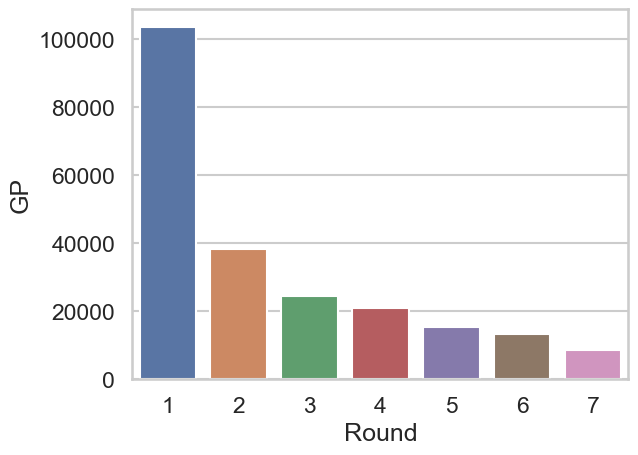

In [108]:
sns.set_theme(style='whitegrid', context='talk')

sns.barplot(x=round_viz.index, y=round_viz['GP'])

<AxesSubplot: xlabel='Round', ylabel='PTS'>

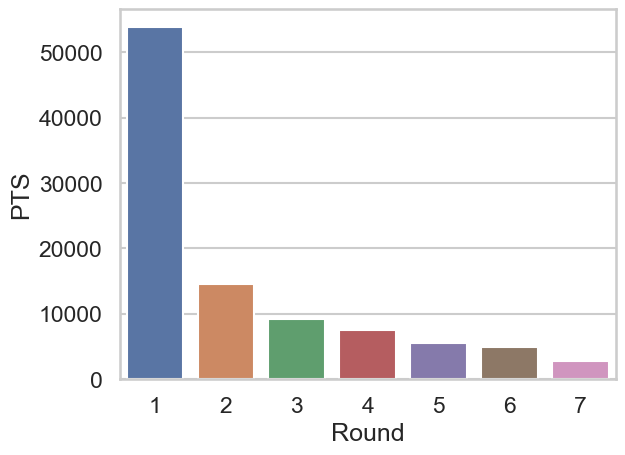

In [109]:
sns.set_theme(style='whitegrid', context='talk')

sns.barplot(x=round_viz.index, y=round_viz['PTS'])

<AxesSubplot: xlabel='Round', ylabel='NHLer Probability'>

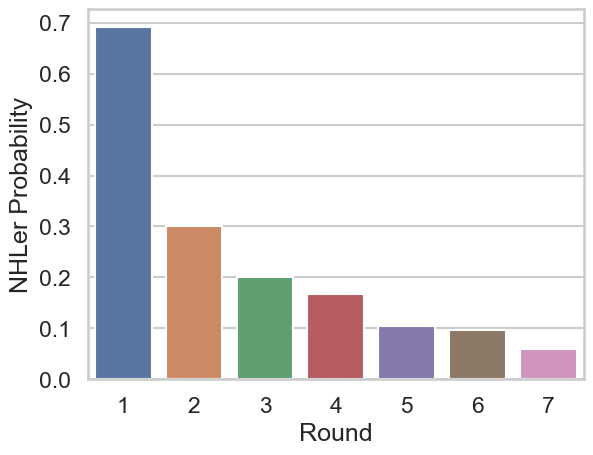

In [107]:
sns.set_theme(style='whitegrid', context='talk')

sns.barplot(x=round_viz.index, y=round_viz['NHLer Probability'])

In [124]:
overall_viz=final_draftDB.groupby('Overall').agg({'GP': 'sum', 'PTS': 'sum', 'Team': 'count', 'NHLer': 'sum'})

In [125]:
overall_viz

,GP,PTS,Team,NHLer
Overall,,,,
1,6129.0,5434.0,8,8.0
2,6034.0,4120.0,8,8.0
3,5447.0,3314.0,8,8.0
4,4902.0,2479.0,8,7.0
5,5229.0,2470.0,8,7.0
...,...,...,...,...
207,152.0,47.0,7,0.0
208,634.0,426.0,7,1.0
209,198.0,53.0,8,0.0


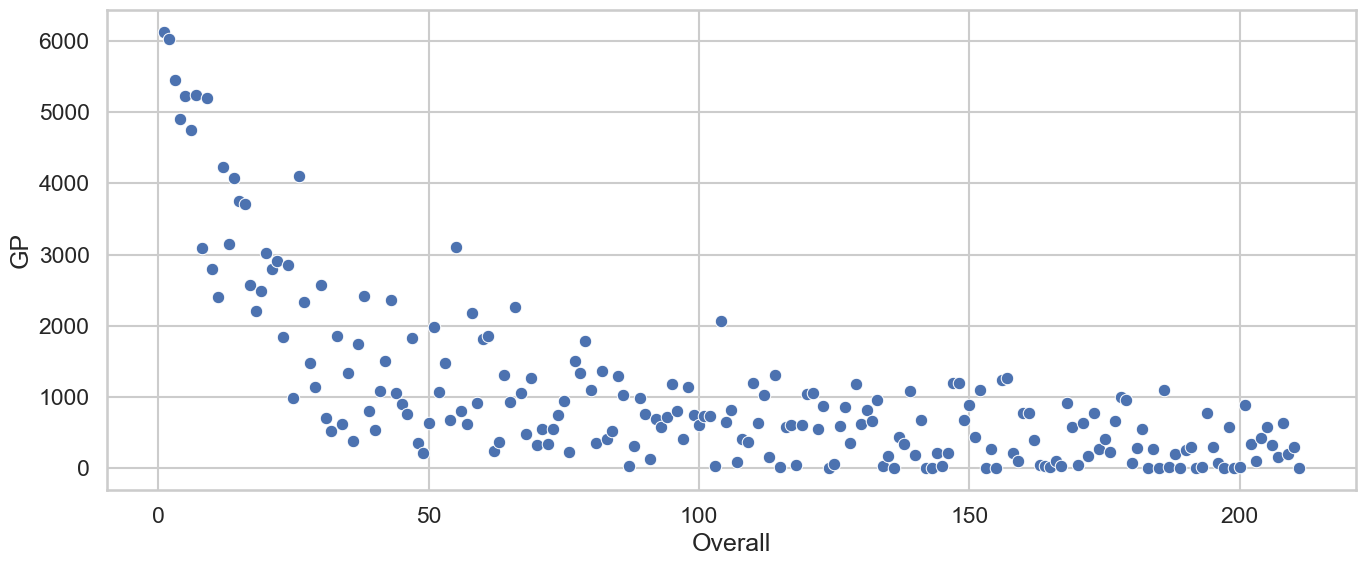

In [132]:
sns.set_theme(style='whitegrid', context='talk')
plt.figure(figsize=(14,6))

sns.scatterplot(x=overall_viz.index, y=overall_viz['GP'])
plt.tight_layout()
plt.show()

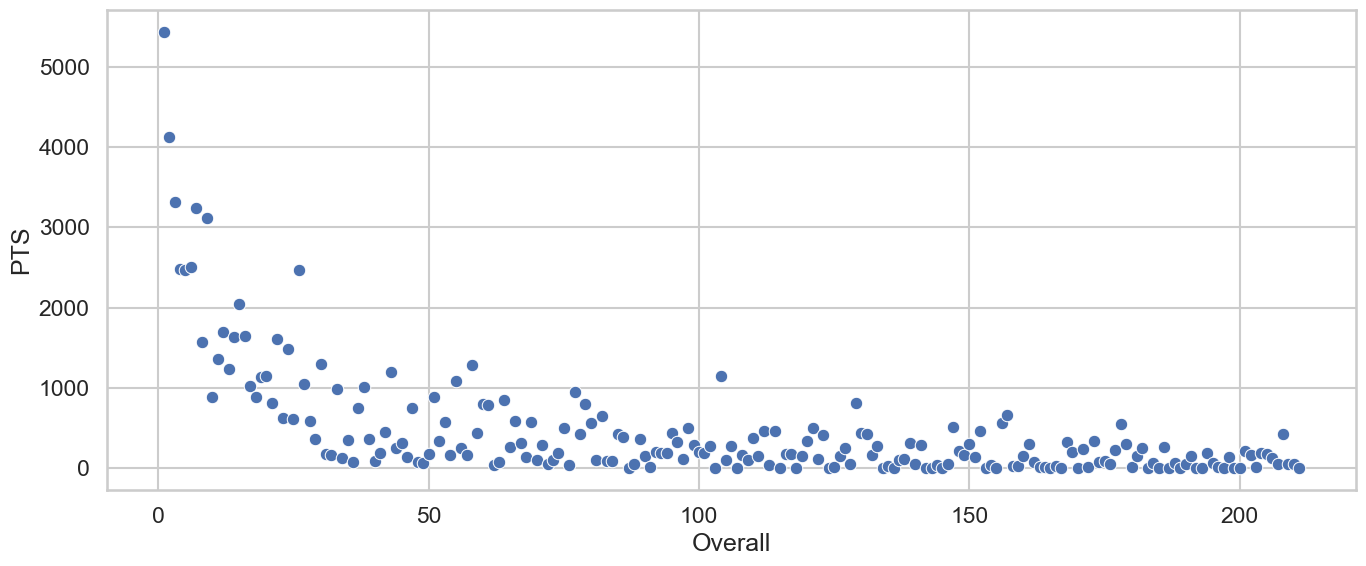

In [133]:
sns.set_theme(style='whitegrid', context='talk')
plt.figure(figsize=(14,6))

sns.scatterplot(x=overall_viz.index, y=overall_viz['PTS'])
plt.tight_layout()
plt.show()